In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt

numclasses, count = 8, 200
x = torch.randn(count, 4)
y = torch.randint(0, numclasses, size=[count])

dataset = torch.utils.data.TensorDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle = True) 

model = torch.nn.Sequential(
        torch.nn.Linear(4, 20), 
        torch.nn.ReLU(), 
        torch.nn.Linear(20, numclasses), 
        torch.nn.Softmax(dim=1))
print(x.shape)
print(y.shape)

torch.Size([200, 4])
torch.Size([200])


torch.Size([100, 4])
torch.Size([100, 8])
torch.Size([100])
tensor(2.0770, grad_fn=<NllLossBackward0>)


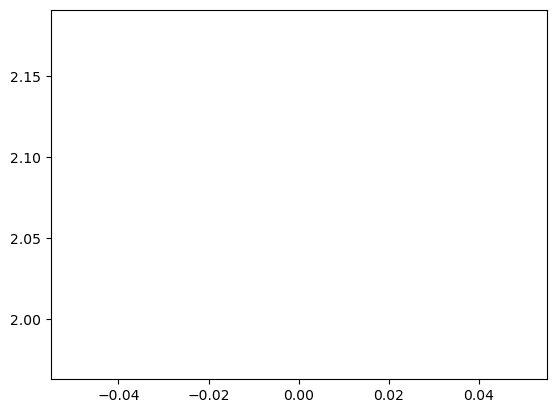

In [13]:
lossf = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

losses = []
for epoch in range(30):
    for batch in dataloader:
        x, y = batch
        out = model(x) 
        loss = lossf(out, y)
        print(x.shape)
        print(out.shape)
        print(y.shape)
        print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append( loss.item() )
        break
    break

plt.plot(losses)